## 1.  Predictive Model With External and Store Data
Goal: predict sales for rows in test.csv considering variables below:

- Sales data (train.csv)
- Store metadata (stores.csv)
- Oil price data (oil.csv)
- Promotion status
- Date features: day of week, month, holiday

In [1]:
import pandas as pd

# Load data
train = pd.read_csv("dataset/train.csv", parse_dates=['date'])
stores = pd.read_csv("dataset/stores.csv")
oil = pd.read_csv("dataset/oil.csv", parse_dates=['date'])

# Fill oil NaNs
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')

df = pd.merge(train, stores, on='store_nbr', how='left')

df = pd.merge(df, oil, on='date', how='left')

df.head()


/var/folders/h2/r_jqcqxj3x13sjfnkq903k940000gp/T/ipykernel_16370/3193192721.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')


,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14


In [2]:
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_of_week,month,year,day,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1,1,2013,1,0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1,1,2013,1,0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1,1,2013,1,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1,1,2013,1,0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1,1,2013,1,0


In [11]:
df['family'] = df['family'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['state'] = df['state'].astype('category').cat.codes
df['type'] = df['type'].astype('category').cat.codes
df['cluster'] = df['cluster'].astype('int')

df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_of_week,month,year,day,is_weekend,oil_ma7,oil_ma30,sales_lag_1,sales_lag_7
0,0,2013-01-01,1,0,0.0,0,18,12,3,13,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN
1782,1782,2013-01-02,1,0,2.0,0,18,12,3,13,93.14,2,1,2013,2,0,93.14,93.14,0.0,NaN
3564,3564,2013-01-03,1,0,3.0,0,18,12,3,13,92.97,3,1,2013,3,0,92.97,92.97,2.0,NaN
5346,5346,2013-01-04,1,0,3.0,0,18,12,3,13,93.12,4,1,2013,4,0,93.12,93.12,3.0,NaN
7128,7128,2013-01-05,1,0,5.0,0,18,12,3,13,NaN,5,1,2013,5,1,NaN,NaN,3.0,NaN


Preços de commodities como petróleo flutuam diariamente por fatores que não afetam diretamente o consumidor final naquele mesmo dia. Suavizar ajuda o modelo a ver tendências em vez de ruídos diários.

In [12]:
df = df.sort_values('date')
df['oil_ma7'] = df['dcoilwtico'].rolling(window=7, min_periods=1).mean()
df['oil_ma30'] = df['dcoilwtico'].rolling(window=30, min_periods=1).mean()

df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_of_week,month,year,day,is_weekend,oil_ma7,oil_ma30,sales_lag_1,sales_lag_7
0,0,2013-01-01,1,0,0.0,0,18,12,3,13,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN
1305,1305,2013-01-01,45,18,0.0,0,18,12,0,11,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN
1763,1763,2013-01-01,9,14,0.0,0,18,12,1,6,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN
1304,1304,2013-01-01,45,17,0.0,0,18,12,0,11,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN
1764,1764,2013-01-01,9,15,0.0,0,18,12,1,6,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN


In [13]:
df = df.sort_values(['store_nbr', 'family', 'date'])
df['sales_lag_1'] = df.groupby(['store_nbr', 'family'])['sales'].shift(1)
df['sales_lag_7'] = df.groupby(['store_nbr', 'family'])['sales'].shift(7)

df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_of_week,month,year,day,is_weekend,oil_ma7,oil_ma30,sales_lag_1,sales_lag_7
0,0,2013-01-01,1,0,0.0,0,18,12,3,13,93.14,1,1,2013,1,0,93.14,93.14,NaN,NaN
1782,1782,2013-01-02,1,0,2.0,0,18,12,3,13,93.14,2,1,2013,2,0,93.14,93.14,0.0,NaN
3564,3564,2013-01-03,1,0,3.0,0,18,12,3,13,92.97,3,1,2013,3,0,92.97,92.97,2.0,NaN
5346,5346,2013-01-04,1,0,3.0,0,18,12,3,13,93.12,4,1,2013,4,0,93.12,93.12,3.0,NaN
7128,7128,2013-01-05,1,0,5.0,0,18,12,3,13,NaN,5,1,2013,5,1,NaN,NaN,3.0,NaN


## Training

In [14]:
df_model = df.dropna(subset=['sales_lag_1', 'sales_lag_7'])  # remove primeiras datas sem lag

In [15]:
# Define target
y = df_model['sales']


# Define features (containing lag)
X = df_model[[
    'onpromotion', 'family', 'type', 'city', 'state', 'cluster',
    'day_of_week', 'month', 'is_weekend',
    'dcoilwtico', 'oil_ma7', 'oil_ma30',
    'sales_lag_1', 'sales_lag_7'
]]

In [16]:
split_date = '2017-06-01'
X_train = X[df_model['date'] < split_date]
y_train = y[df_model['date'] < split_date]

X_valid = X[df_model['date'] >= split_date]
y_valid = y[df_model['date'] >= split_date]

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def train_and_evaluate(X, y):
    model = RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)
    model.fit(X, y)
    y_pred = model.predict(X_valid[X.columns])
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    return rmse, y_pred

In [29]:
features_no_lag = [
    'onpromotion', 'family', 'type', 'city', 'state', 'cluster',
    'day_of_week', 'month', 'is_weekend',
    'dcoilwtico', 'oil_ma7', 'oil_ma30'
]

X_train_nolag = X_train[features_no_lag]
X_valid_nolag = X_valid[features_no_lag]

rmse_nolag, y_pred_nolag = train_and_evaluate(X_train_nolag, y_train)

print(f'RMSE without lag: {round(rmse_nolag, 2)}')

RMSE without lag: 426.61


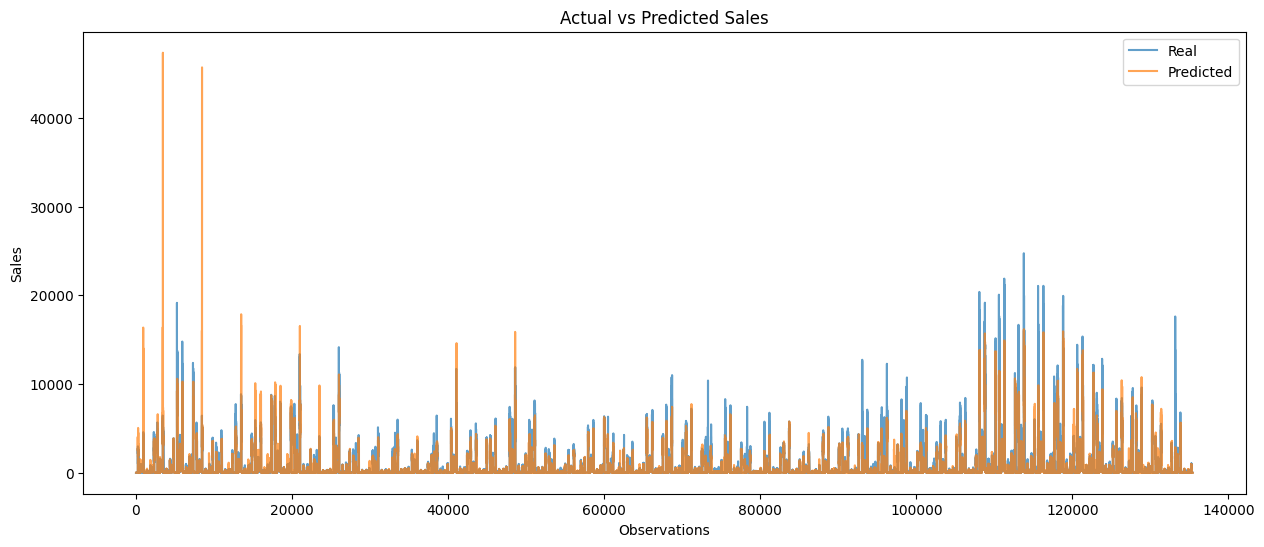

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(y_valid.reset_index(drop=True), label='Real', alpha=0.7)
plt.plot(pd.Series(y_pred_nolag), label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.legend()
plt.show()

RMSE = 446.94 means that on average, your model’s predictions are off by ~447 units sold per store-family-day.

In [23]:
y_valid.mean(), y_valid.median()

(np.float64(480.8879927314209), np.float64(29.0))

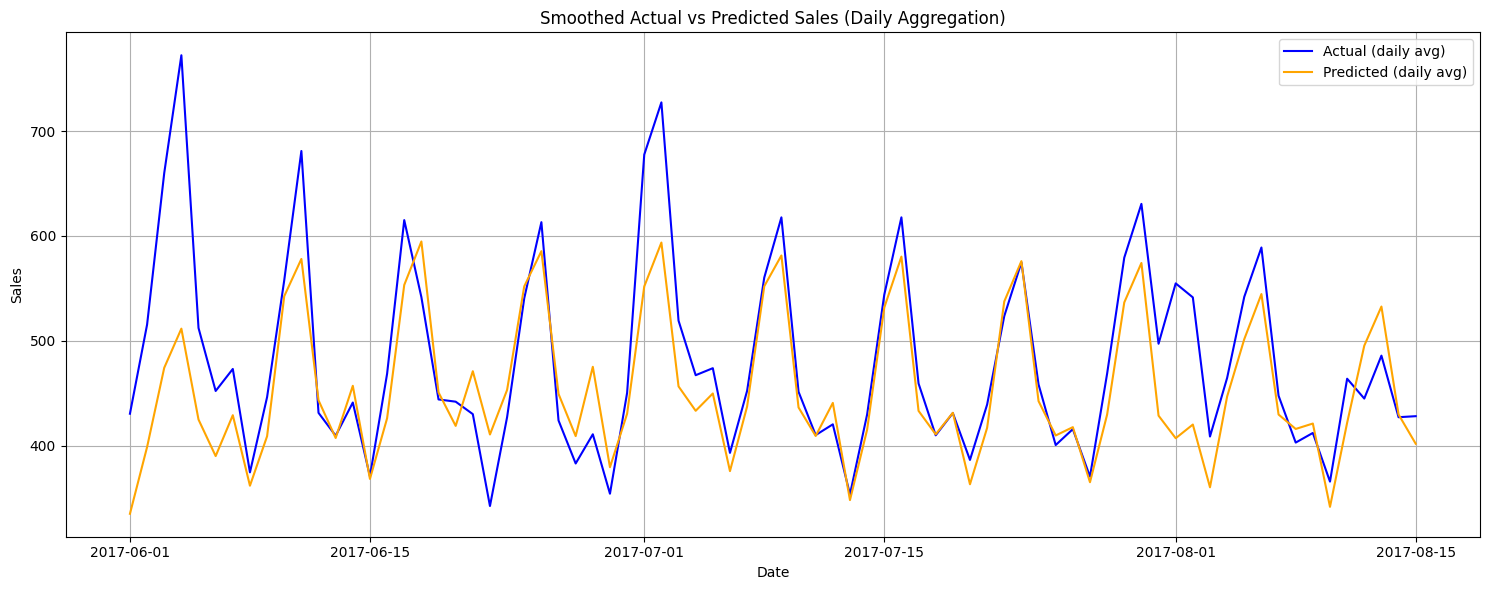

In [38]:
# dataFrame temporário com y_valid, y_pred e a data
df_plot = pd.DataFrame({
    'date': df_model[df_model['date'] >= split_date]['date'].reset_index(drop=True),
    'actual': y_valid.reset_index(drop=True),
    'predicted': y_pred_nolag
})

# agrupar dados diarios
df_grouped = df_plot.resample('1D', on='date').mean()

# Plotar
plt.figure(figsize=(15,6))
plt.plot(df_grouped.index, df_grouped['actual'], label='Actual (daily avg)', color='blue')
plt.plot(df_grouped.index, df_grouped['predicted'], label='Predicted (daily avg)', color='orange')
plt.title('Smoothed Actual vs Predicted Sales (Daily Aggregation)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
features_with_lag = [
    'onpromotion', 'family', 'type', 'city', 'state', 'cluster',
    'day_of_week', 'month', 'is_weekend',
    'dcoilwtico', 'oil_ma7', 'oil_ma30',
    'sales_lag_1', 'sales_lag_7'
]

X_train_lag = X_train[features_with_lag]
X_valid_lag = X_valid[features_with_lag]

rmse_lag, y_pred_lag = train_and_evaluate(X_train_lag, y_train)

print(f'RMSE with lag: {round(rmse_lag, 2)}')

RMSE with lag: 256.21


In [ ]:
import matplotlib.pyplot as plt

plt.bar(['Without Lag', 'With Lag'], [rmse_nolag, rmse_lag], color=['gray', 'green'])
plt.ylabel('RMSE')
plt.title('Impact of Lag Features on Model Performance')
plt.show()

In [27]:
df.describe()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_of_week,month,year,day,is_weekend,oil_ma7,oil_ma30,sales_lag_1,sales_lag_7
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.143746e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.145192e+06,2.150735e+06,2.999106e+06,2.988414e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088640,2.750000e+01,1.600000e+01,3.577757e+02,2.602770e+00,1.255556e+01,8.796296e+00,2.000000e+00,8.481481e+00,6.788783e+01,2.997031e+00,6.207838e+00,2.014838e+03,1.563005e+01,2.856295e-01,6.788787e+01,6.788801e+01,3.577340e+02,3.574643e+02
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,0.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,2.619000e+01,2.619000e+01,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,6.000000e+00,1.000000e+00,4.000000e+00,4.640000e+01,1.000000e+00,3.000000e+00,2.014000e+03,8.000000e+00,0.000000e+00,4.640000e+01,4.640000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.600000e+01,1.100000e+01,0.000000e+00,1.400000e+01,1.000000e+01,2.000000e+00,8.500000e+00,5.330000e+01,3.000000e+00,6.000000e+00,2.015000e+03,1.600000e+01,0.000000e+00,5.330000e+01,5.330000e+01,1.100000e+01,1.100000e+01
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,2.400000e+01,1.958473e+02,0.000000e+00,1.800000e+01,1.200000e+01,3.000000e+00,1.300000e+01,9.578000e+01,5.000000e+00,9.000000e+00,2.016000e+03,2.300000e+01,1.000000e+00,9.578000e+01,9.578000e+01,1.957740e+02,1.952097e+02
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,3.200000e+01,1.247170e+05,7.410000e+02,2.100000e+01,1.500000e+01,4.000000e+00,1.700000e+01,1.106200e+02,6.000000e+00,1.200000e+01,2.017000e+03,3.100000e+01,1.000000e+00,1.106200e+02,1.106200e+02,1.247170e+05,1.247170e+05
std,8.662819e+05,NaN,1.558579e+01,9.521906e+00,1.101998e+03,1.221888e+01,6.264737e+00,4.165021e+00,1.201851e+00,4.649735e+00,2.566954e+01,2.000740e+00,3.385668e+00,1.345518e+00,8.794789e+00,4.517138e-01,2.566956e+01,2.566967e+01,1.102006e+03,1.101797e+03
